In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## a) simulation and visualization of the Geometric distribution with different values of the success probability 
𝑝
∈
{
0.1
,
0.5
,
0.9
}
p∈{0.1,0.5,0.9}, using 10,000 samples for each case.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


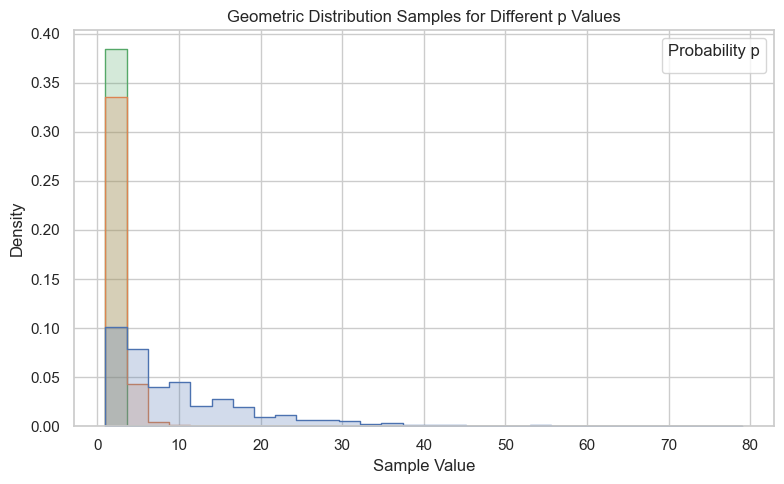

In [ ]:

sns.set(style="whitegrid")
p_values = [0.1, 0.5, 0.9]
n_samples = 10000

geometric_samples = {f"p={p}": np.random.geometric(p, n_samples) for p in p_values}

df = pd.DataFrame({key: pd.Series(val) for key, val in geometric_samples.items()})
df_melted = df.melt(var_name="p", value_name="Sample Value")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_melted, x="Sample Value", hue="p", element="step", stat="density", common_norm=False, bins=30)
plt.title("Geometric Distribution Samples for Different p Values")
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.legend(title="Probability p")
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


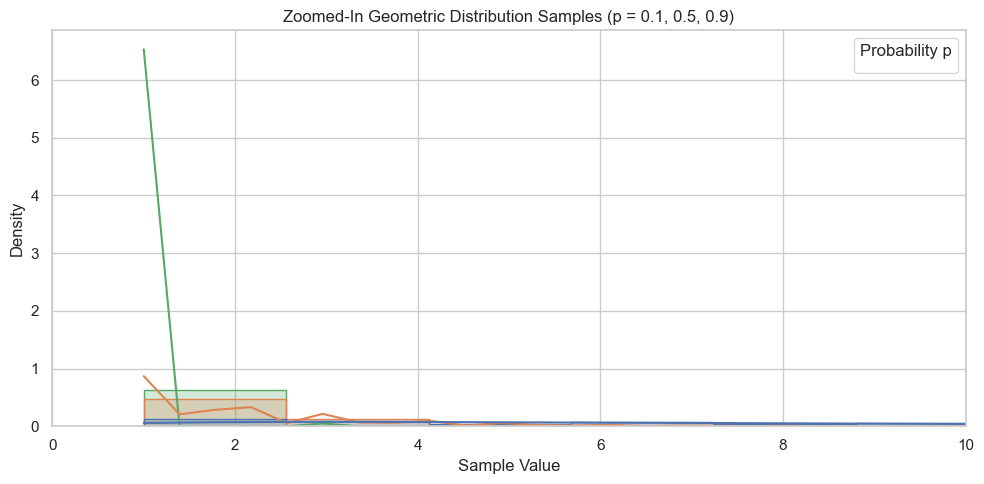

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(data=df_melted, x="Sample Value", hue="p", element="step", stat="density",
             common_norm=False, bins=50, kde=True, color="red")
plt.xlim(0, 10)  # Zoom in
plt.title("Zoomed-In Geometric Distribution Samples (p = 0.1, 0.5, 0.9)")
plt.xlabel("Sample Value")
plt.ylabel("Density")
plt.legend(title="Probability p")
plt.tight_layout()
plt.show()

p_df = pd.DataFrame({"p": [0.1, 0.5, 0.9]})

p Sample Value
p=0.1            11
p=0.1             1
p=0.1            23
p=0.1            12
p=0.1             4

## 2b

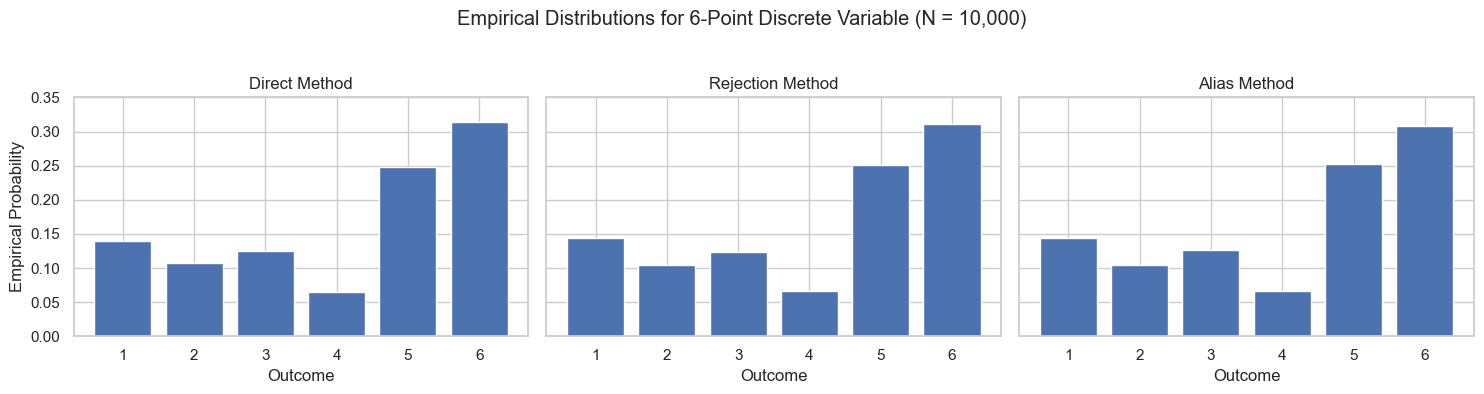

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

values = np.arange(1, 7)
p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
N = 10000

# Direct (Crude) Method
U = np.random.rand(N)
cdf = np.cumsum(p)
samples_direct = values[np.searchsorted(cdf, U)]

# Rejection Method
C = np.max(p / (1/6))
samples_rej = []
while len(samples_rej) < N:
    Y = np.random.randint(1, 7)
    U2 = np.random.rand()
    if U2 <= p[Y-1] / (C * (1/6)):
        samples_rej.append(Y)
samples_rej = np.array(samples_rej)

# Alias Method setup
k = 6
A = p * k
F = A.copy()
L = np.zeros(k, dtype=int)
small = [i for i, f in enumerate(F) if f < 1]
large = [i for i, f in enumerate(F) if f >= 1]
while small and large:
    j = small.pop(0)
    i = large.pop(0)
    L[j] = i
    F[i] = F[i] - (1 - F[j])
    if F[i] < 1:
        small.append(i)
    else:
        large.append(i)

# Alias Method sampling
samples_alias = []
for _ in range(N):
    i = np.random.randint(0, k)
    u = np.random.rand()
    samples_alias.append(i+1 if u < F[i] else L[i]+1)
samples_alias = np.array(samples_alias)

# Empirical probabilities
emp = pd.DataFrame({
    'Value': values,
    'Direct': [(samples_direct == v).mean() for v in values],
    'Rejection': [(samples_rej == v).mean() for v in values],
    'Alias': [(samples_alias == v).mean() for v in values]
})

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

methods = ['Direct', 'Rejection', 'Alias']
samples_list = [samples_direct, samples_rej, samples_alias]

for ax, method, samples in zip(axs, methods, samples_list):
    counts = [(samples == v).sum() / N for v in values]
    ax.bar(values, counts)
    ax.set_title(f"{method} Method")
    ax.set_xlabel("Outcome")
    ax.set_xticks(values)
    ax.set_ylim(0, 0.35)

axs[0].set_ylabel("Empirical Probability")
plt.suptitle("Empirical Distributions for 6-Point Discrete Variable (N = 10,000)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
